In [66]:
import numpy as np
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp

In [2]:
def f_true(x):
    # R^3 --> R
    return x[0] ** 2 + x[1] * x[2] + 7 * x[0] * x[2]

In [55]:
N = 5000
X = np.random.uniform(size = (N,3))
Y = jax.vmap(f_true)(X)

In [56]:
def k(x,y):
    return (1. + x@y)**2

In [57]:
K = jax.jit( lambda X_in,X: jax.vmap(lambda x: jax.vmap(lambda y: k(x,y))(X) )(X_in) )

In [58]:
lmbd  = 1e-3
alpha = jnp.linalg.solve(  K(X,X) + lmbd * jnp.eye(len(X)),Y)

In [59]:
X_test = np.random.randn(N,3)
Y_test = jax.vmap(f_true)(X_test)

In [60]:
Y_hat = K(X_test,X) @ alpha

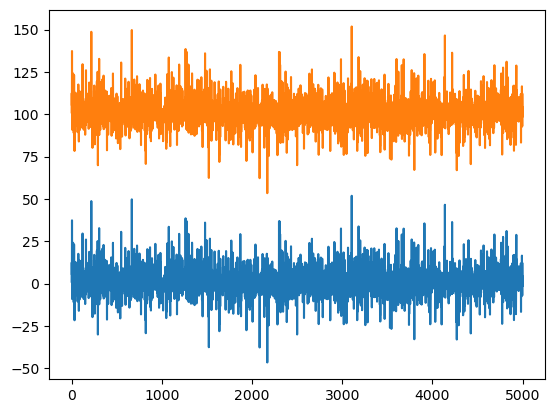

In [61]:
plt.plot(Y_test)
plt.plot(Y_hat + 100)

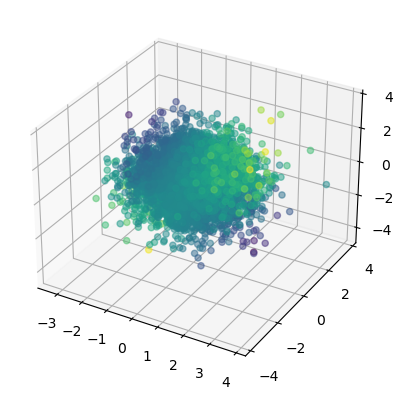

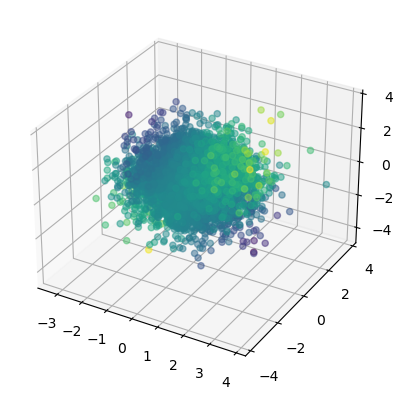

In [65]:
ax = plt.figure().add_subplot(projection  = '3d')
ax.scatter(X_test[:,0],X_test[:,1],X_test[:,2], c = Y_hat, alpha = 0.5)
ax = plt.figure().add_subplot(projection  = '3d')
ax.scatter(X_test[:,0],X_test[:,1],X_test[:,2], c = Y_test, alpha = 0.5)


# Local Kernel Experiment

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp

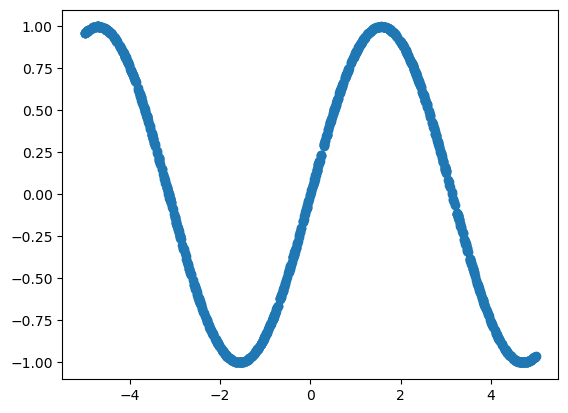

In [90]:
N = 1000
X = ((np.random.uniform(size = N) * 2 - 1.) * 5)[:,None]
Y = jax.vmap(jnp.sin)(X)
plt.scatter(X,Y)

In [109]:
def local_kernel_predictor(x, X, Y):
    chosen = np.linalg.norm(x - X,axis = 1) < 1.
    X_loc = X[chosen]
    Y_loc = Y[chosen]
    
    def k(x,y):
        return (1. + x@y)**2
    K = jax.jit( lambda X_in,X: jax.vmap(lambda x: jax.vmap(lambda y: k(x,y))(X) )(X_in) )
    lmbd  = 1e-2
    alpha = jnp.linalg.solve(  K(X,X) + lmbd * jnp.eye(len(X)),Y)
    
    def predict(X_in):
        return K(X_in, X) @ alpha
    return predict

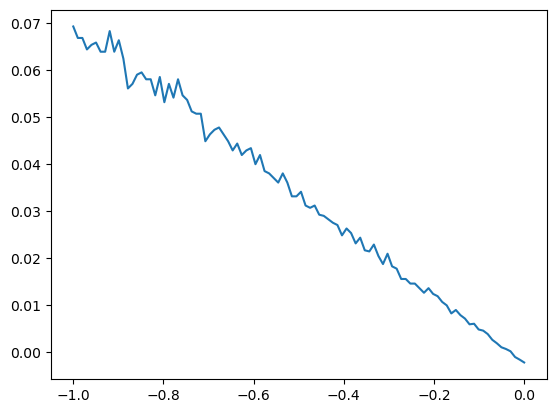

In [112]:
punto = -0.5
X_hat = np.linspace(-0.5,0.5,100)[:,None] + punto 
Y_hat = local_kernel_predictor( punto , X, Y)( X_hat)
plt.plot(X_hat.flatten(),Y_hat.flatten())